# Ramsey King
# DSC 630 - Predictive Analytics
# September 16, 2021
# Exercise 3.2

I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:
- Box plots
- Scatter plots
- Regression Model

First, I will read the csv file into a pandas dataframe:

In [85]:
import pandas as pd
import numpy as np

dodgers_df = pd.read_csv('dodgers.csv')
dodgers_df.head(20)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


I am curious to see how many different types of 'skies' were recorded and the different teams that the Dodgers played:

In [86]:
print(dodgers_df['skies'].unique())
dodgers_df['opponent'].unique()

['Clear ' 'Cloudy']


array(['Pirates', 'Padres', 'Braves', 'Nationals', 'Giants', 'Rockies',
       'Snakes', 'Cardinals', 'Astros', 'Brewers', 'Angels', 'White Sox',
       'Mets', 'Reds', 'Phillies', 'Cubs', 'Marlins'], dtype=object)

From this, if the need arises, I will convert the skies, day_night, cap, shirt, fireworks, and bobblehead columns to numeric columns for analysis.  For now, I would like to get statistics on the attendance.

In [87]:
# Creating numeric variables from categorical variables
# dodgers_df = pd.get_dummies(dodgers_df)
# dodgers_df

count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64


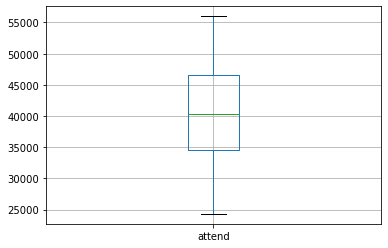

In [88]:
import matplotlib.pyplot as plt

dodgers_df.boxplot(column=['attend'])
print(dodgers_df['attend'].describe())

In [89]:
# dataframe where attendance was 75% quartile or higher:
dodgers_df_75 = dodgers_df[dodgers_df['attend']>=46588]
dodgers_df_75.head(21)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES
11,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO
17,MAY,13,49124,Sunday,Rockies,70,Clear,Day,NO,NO,NO,NO
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,NO,NO,NO,YES
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,NO,NO,NO,NO
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,NO,NO,NO,YES


In [90]:
# dataframe where attendance was 75% quartile or higher:
dodgers_df_25 = dodgers_df[dodgers_df['attend']<=34493]
dodgers_df_25.head(21)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
13,MAY,8,32799,Tuesday,Giants,75,Clear,Night,NO,NO,NO,NO
14,MAY,9,33993,Wednesday,Giants,71,Clear,Night,NO,NO,NO,NO
16,MAY,12,33735,Saturday,Rockies,65,Clear,Night,NO,NO,NO,NO
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO
25,MAY,27,33306,Sunday,Astros,70,Clear,Day,NO,NO,NO,NO


Bobbleheads on a Monday night is probably a good thing. Mondays are most consistent lower IQR nights and bobbleheads are most consistent upper IQR events.

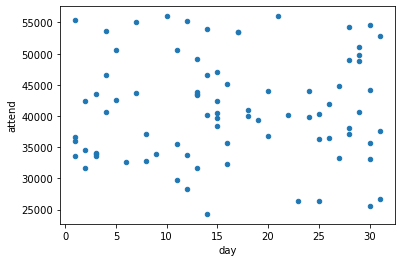

In [91]:
# Will look at a few scatter plots to see if there are any correlations.  The first will be day vs attendance.

dodgers_df.plot.scatter('day', 'attend')


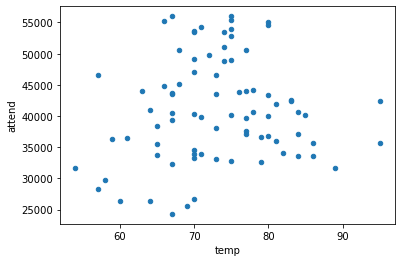

In [92]:
# Temp vs attendance.

dodgers_df.plot.scatter('temp', 'attend')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           81 non-null     object
 1   day             81 non-null     int64 
 2   attend          81 non-null     int64 
 3   day_of_week     81 non-null     object
 4   opponent        81 non-null     object
 5   temp            81 non-null     int64 
 6   skies           81 non-null     object
 7   day_night       81 non-null     object
 8   cap             81 non-null     object
 9   shirt           81 non-null     object
 10  fireworks       81 non-null     object
 11  bobblehead      81 non-null     object
 12  day_num         81 non-null     int64 
 13  bobble_numeric  81 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 9.0+ KB


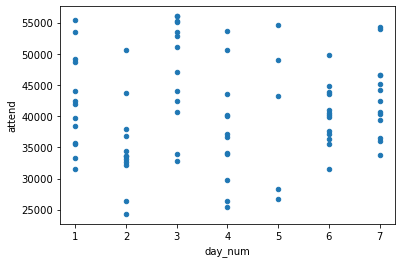

In [99]:
# Day of week vs attendance.
day_dict = {
    'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7,
}

dodgers_df['day_num'] = dodgers_df['day_of_week'].apply(lambda x: day_dict.get(x)).astype(int)
dodgers_df.plot.scatter('day_num', 'attend')

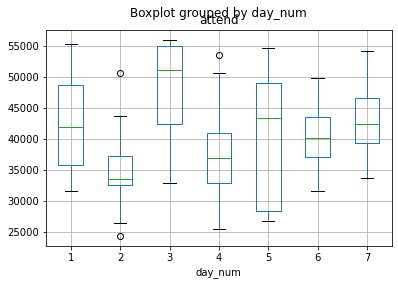

In [94]:
# Boxplot of day vs attendance.
dodgers_df.boxplot(column=['attend'], by='day_num')

Based on what we've seen so far, I believe that running a promotion on Mondays and including bobbleheads or a t-shirt
will be beneficial to raise attendance.

In [101]:
# Going to add a numeric column for bobbleheads (0 = No, 1 = Yes)
dodgers_df['bobble_numeric'] = dodgers_df['bobblehead'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['cap_numeric'] = dodgers_df['cap'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['shirt_numeric'] = dodgers_df['shirt'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['fireworks_numeric'] = dodgers_df['fireworks'].apply(lambda x: 0 if x == 'NO' else 1)

game_time = pd.get_dummies(dodgers_df['day_night'])
dodgers_df = pd.concat([dodgers_df, game_time], axis=1)

dodgers_df.head(11)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_num,bobble_numeric,day_night_numeric,cap_numeric,shirt_numeric,fireworks_numeric,Day,Night
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,3,0,1,0,0,0,1,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,4,0,1,0,0,0,0,1
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,5,0,1,0,0,0,0,1
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,6,0,1,0,0,1,0,1
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,7,0,1,0,0,0,0,1
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,1,0,1,0,0,0,1,0
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,2,0,1,0,0,0,0,1
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO,3,0,1,0,0,0,0,1
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,4,0,1,0,0,0,0,1
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO,6,0,1,0,0,1,0,1


In [96]:
from sklearn.linear_model import LinearRegression
x = dodgers_df['bobble_numeric'].values.reshape(-1,1)
y = dodgers_df['attend']

model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
r_sq

0.3386017539503713

In [105]:
from sklearn.linear_model import LinearRegression
tuesdays = dodgers_df[dodgers_df['day_num'] == 3]
x = tuesdays['bobble_numeric'].values.reshape(-1,1)
y = tuesdays['attend']

print(tuesdays.head(12))
model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
r_sq

   month  day  attend day_of_week  opponent  temp   skies day_night  cap  \
0    APR   10   56000     Tuesday   Pirates    67  Clear        Day   NO   
7    APR   24   44014     Tuesday    Braves    63  Cloudy     Night   NO   
13   MAY    8   32799     Tuesday    Giants    75  Clear      Night   NO   
19   MAY   15   47077     Tuesday    Snakes    70  Clear      Night   NO   
27   MAY   29   51137     Tuesday   Brewers    74  Clear      Night   NO   
31   JUN   12   55279     Tuesday    Angels    66  Cloudy     Night   NO   
41   JUL    3   33884     Tuesday      Reds    70  Cloudy     Night  YES   
47   JUL   17   53498     Tuesday  Phillies    70  Clear      Night   NO   
50   JUL   31   52832     Tuesday    Snakes    75  Cloudy     Night   NO   
56   AUG    7   55024     Tuesday   Rockies    80  Clear      Night   NO   
59   AUG   21   56000     Tuesday    Giants    75  Clear      Night   NO   
69   SEP    4   40619     Tuesday    Padres    78  Clear      Night   NO   

   shirt fi

0.35827828776026516